# Playing with the Fashion MNIST dataset

Fashion-MNIST is a dataset of Zalando’s article images . Each example is a 28×28 grayscale image, belonging to 10 types of their products ( E.g : Shirt , Trouser , Footwear etc). Fashion-MNIST is similar to the MNIST dataset for digits in that both have the same width & height of images.


## The Problem & My approach :-

So given this dataset the task is to create an algorithm which when provided with an would accurately predict the class to which the product belongs.

I have used some of the Deep Learning algorithms that I have learnt untill this day on this dataset. Since , I have used a Kaggle kernel to compute my results thus I havent provided the dataset in the repo.

But you may download it from this URL : https://www.kaggle.com/zalando-research/fashionmnist

Overall this dataset is a bit complex one when compared to the Digits - MNIST dataset .

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 'train-images-idx3-ubyte', 'fashion-mnist_train.csv', 'fashion-mnist_test.csv']


## Looking at the training data

In [3]:
df = pd.read_csv("../input/fashion-mnist_train.csv")
print(df.shape)

(60000, 785)


In [4]:
print(df.head())

   label  pixel1  pixel2    ...     pixel782  pixel783  pixel784
0      2       0       0    ...            0         0         0
1      9       0       0    ...            0         0         0
2      6       0       0    ...            0         0         0
3      0       0       0    ...            0         0         0
4      3       0       0    ...            0         0         0

[5 rows x 785 columns]


## Visualizing the data

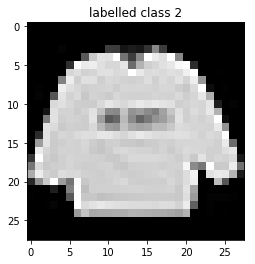

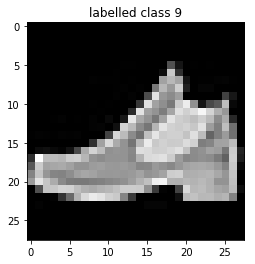

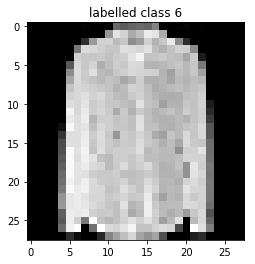

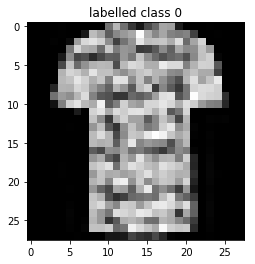

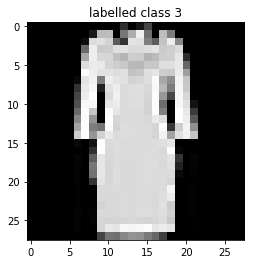

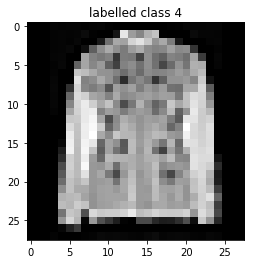

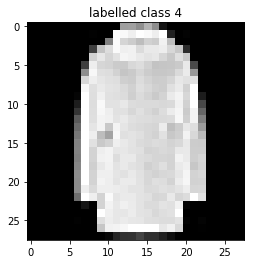

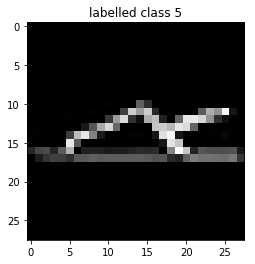

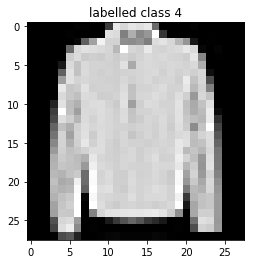

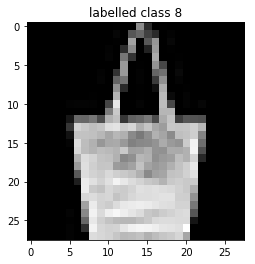

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    sample = np.array(df.iloc[i,1:]).reshape(28,28)
    plt.figure()
    plt.title("labelled class {}".format(df.iloc[i,0]))
    plt.imshow(sample , 'gray')

## Creating a training set

From the 60000 images I would be using 55000 for the training set & 5000 for the testing set

In [6]:
X_train = np.array(df.iloc[:55000,1:785])
print(X_train.shape)

(55000, 784)


## Creating a test set

In [7]:
X_test = np.array(df.iloc[55000:60000,1:785])
print(X_test.shape)

(5000, 784)


In [9]:
y = np.array(df.iloc[:,0]).reshape(-1,1)
print(y.shape)

(60000, 1)


## Data pre-processing

We are going to use one hot encoding because we are performing a multi-class classification.

In [11]:
## Using one hot-encoding

from keras.utils import to_categorical

y_train = y[:55000]
y_train = to_categorical(y_train)

print(y_train.shape)

Using TensorFlow backend.


(55000, 10)


In [12]:
y_test = y[55000:]
y_test = to_categorical(y_test)

print(y_test.shape)

(5000, 10)


## Using GPU for faster processing

**The 2 line code snippet below allows to use GPUs. If you have an NVIDIA CUDA compatible GPU feel free to run this snippet.But 
if U havent got it then dont run this part. Simply run the later parts as the code can run on CPU as well as GPU.**

In [14]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

## Using a Neural Network

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input so the network generates the best possible result without needing to redesign the output criteria.

An in-depth explanation of the matter can be found at : http://neuralnetworksanddeeplearning.com/index.html

## Creating a fully connected Neural Net

In [16]:
# Using the ReLU activation function here gives us less accuracy, using tanh gave better results.

from keras import models
from keras import layers
from keras import optimizers

network = models.Sequential()

network.add(layers.Dense(512,activation = 'tanh',input_shape=(28 * 28,)))
network.add(layers.Dense(256,activation = 'tanh'))
network.add(layers.Dense(256,activation = 'tanh'))
network.add(layers.Dense(10,activation = 'softmax'))

In [17]:
## Architecture of the network

network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 601,610
Trainable params: 601,610
Non-trainable params: 0
_________________________________________________________________


## Training the neural net

Gradient Descent with RMS-Prop is used to minimize the cost function. The cost function used is cross-entropy.

In [18]:
network.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(X_train, y_train, epochs=50, batch_size=256)

Epoch 1/50
55000/55000 [==============================] - 6s 104us/step - loss: 0.8795 - acc: 0.6661
Epoch 2/50
55000/55000 [==============================] - 6s 106us/step - loss: 0.6572 - acc: 0.7433
Epoch 3/50
55000/55000 [==============================] - 6s 106us/step - loss: 0.6103 - acc: 0.7631
Epoch 4/50
55000/55000 [==============================] - 6s 106us/step - loss: 0.5650 - acc: 0.7827
Epoch 5/50
55000/55000 [==============================] - 6s 106us/step - loss: 0.5479 - acc: 0.7912
Epoch 6/50
55000/55000 [==============================] - 6s 106us/step - loss: 0.5266 - acc: 0.7983
Epoch 7/50
55000/55000 [==============================] - 6s 106us/step - loss: 0.5182 - acc: 0.8016
Epoch 8/50
55000/55000 [==============================] - 6s 105us/step - loss: 0.5055 - acc: 0.8069
Epoch 9/50
55000/55000 [==============================] - 6s 107us/step - loss: 0.5018 - acc: 0.8087
Epoch 10/50
55000/55000 [==============================] - 6s 105us/step - loss: 0.4861 - a

We have a 84.47% accuracy in the training set after 50 epochs. Dropout doesn't improve this score.

## Testing the neural net

In [19]:
## Test set results

loss, acc = network.evaluate(X_test, y_test)
print(loss,acc)

5000/5000 [==============================] - 0s 79us/step
0.436150691151619 0.8418


A test set accuracy of 84.18% suggests we don't have a significant amount of overfitting.

Now since we are using image data lets use a CNN to see whether our performance improves or not.

## Using a CNN

A one liner explanation would be : A CNN is a neural net which uses convolution operation instead of full scale matrix multiplication as in a fully connected layer of a neural net.

A great explanation of what a CNN is can be found at : http://cs231n.github.io/convolutional-networks/


## Creating a CNN

In [20]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_train = X_train.astype('float32') / 255

convnet = models.Sequential()

convnet.add(layers.Conv2D(32, (3,3) , activation = 'relu' , input_shape = (28,28,1)))
convnet.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
convnet.add(layers.MaxPooling2D(2,2))
convnet.add(layers.Conv2D(128 , (3,3) , activation = 'relu'))
convnet.add(layers.MaxPooling2D(2,2))

convnet.add(layers.Flatten())
convnet.add(layers.Dense(512,activation = 'relu'))
convnet.add(layers.Dense(10 , activation = 'softmax'))

In [21]:
## Architecture of the network

convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1638912   
__________

## Training the CNN

In [22]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32') / 255

convnet.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
convnet.fit(X_train, y_train , epochs = 10 , batch_size = 256)

Epoch 1/10
55000/55000 [==============================] - 215s 4ms/step - loss: 0.6140 - acc: 0.7764
Epoch 2/10
55000/55000 [==============================] - 211s 4ms/step - loss: 0.3343 - acc: 0.8761
Epoch 3/10
55000/55000 [==============================] - 215s 4ms/step - loss: 0.2647 - acc: 0.9017
Epoch 4/10
55000/55000 [==============================] - 216s 4ms/step - loss: 0.2217 - acc: 0.9171
Epoch 5/10
55000/55000 [==============================] - 217s 4ms/step - loss: 0.1881 - acc: 0.9302
Epoch 6/10
55000/55000 [==============================] - 216s 4ms/step - loss: 0.1595 - acc: 0.9406
Epoch 7/10
55000/55000 [==============================] - 217s 4ms/step - loss: 0.1353 - acc: 0.9495
Epoch 8/10
55000/55000 [==============================] - 216s 4ms/step - loss: 0.1160 - acc: 0.9570
Epoch 9/10
55000/55000 [==============================] - 216s 4ms/step - loss: 0.0978 - acc: 0.9631
Epoch 10/10
55000/55000 [==============================] - 216s 4ms/step - loss: 0.0819 - a

Using a CNN we get an accuracy of almost 97% in the training set.

## Testing the CNN

In [23]:
loss, acc = convnet.evaluate(X_test, y_test)
print(loss,acc)

5000/5000 [==============================] - 4s 767us/step
0.3465754972219467 0.92


An accuracy of 92% in the test set suggests we might have a certain amount of overfitting.

## Using AOC ROC metric

**The area of the AOC ROC curve ( blue curve in the plots shown here ) is an indicator of the performance of the model. Greater the area better is the performance.**

In [24]:
## Plotting AOC ROC curves for the 10 classes.

from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

y_prob = convnet.predict(X_test) 
y_classes = y_prob.argmax(axis=-1)
y_true = label_binarize(y_classes,classes = [i for i in range(10)])    ## Basically  one hot encoding
y_test = label_binarize(y_test,classes = [i for i in range(10)]) 

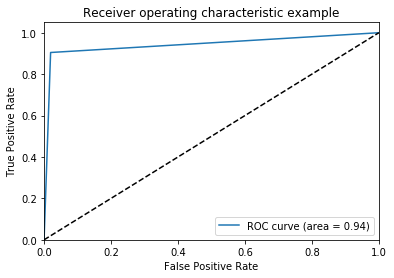

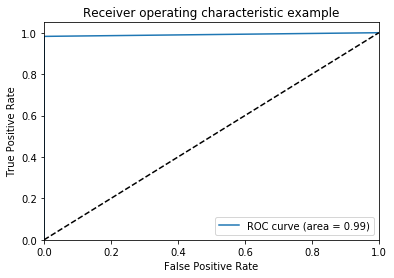

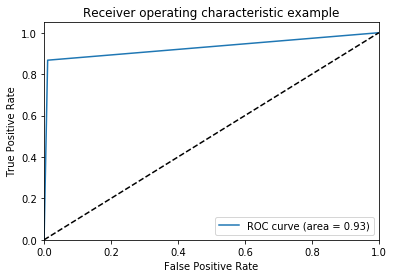

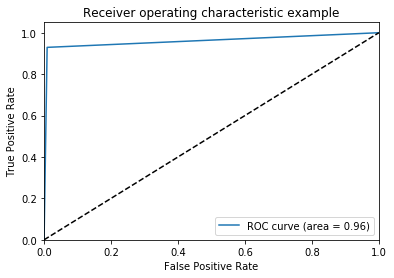

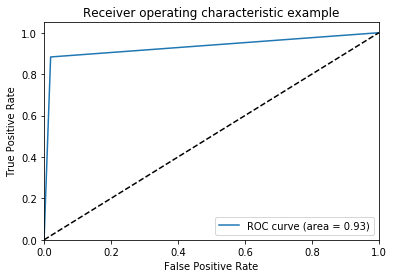

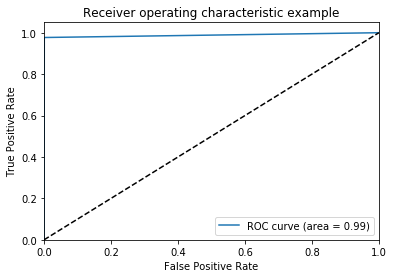

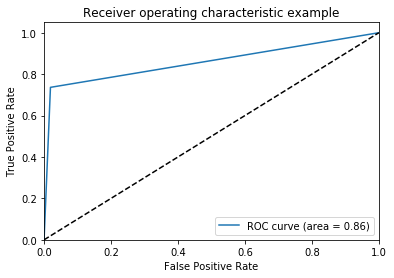

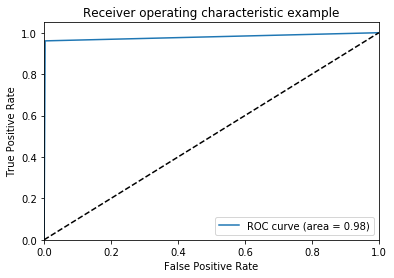

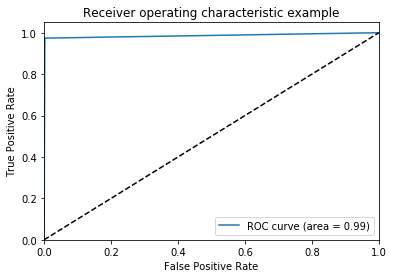

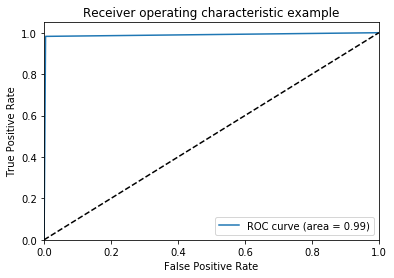

In [25]:
# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_true[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


## Conclusion :  

**An accuracy of 84% was achieved with a fully connected network & an accuracy of 92% was achieved with a CNN in the test set**